---

# **Análise Exploratória**

---


---

> **Qual é o tamanho desta base de dados? Quantos exemplos (linhas) e variáveis (colunas) nós temos?**

Utilizando o método `.shape`, descobrimos que o tamanho da base de dados é:

2200 Linhas

8 Colunas

---

> **Quais variáveis são: numéricas, categóricas, discretas, contínuas, nominais e ordinais?**

Variáveis Numéricas: N, P, K, temperature, humidity, ph, rainfall

Variáveis Categóricas: label

Variáveis discretas: N, P e K

Variáveis contínuas: temperature, humidity, ph e rainfall

Variáveis nominais: Label

Variáveis ordinais: Nenhuma

---

> **Existem outliers nos dados?**

Algumas variáveis, como P, K, temperature, pH, e rainfall, possuem outliers

---

> **Como estão distribuídas as classes em um problema de classificação?**


Estão distribuidas em 100 para cada catégoria do Label

---

> **Há correlações significativas entre variáveis?**

P (fósforo) e K (potássio) A correlação é de 0.74 , o que sugere que solos com altos níveis de fósforo tendem a apresentar também altos níveis de potássio, e vice-versa.

Todas as outras correlações entre variáveis estão abaixo de 0.4 em valor absoluto

---

> **Quais são as estatísticas descritivas básicas das variáveis numéricas?**

---

> **Quais são os tipos de dados e quantidades de valores nulos?**


As variáveis N, P, e K são do tipo int64 e as variáveis temperature, humidity, ph, e rainfall são do tipo float64.
Não possui valores nulos


---

> **Quantas ocorrências de cada valor único das variáveis categóricas?**

Cada classe das 22 cultura (como arroz, milho, juta, etc.) possui exatamente 100 ocorrências.

---


In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
# Verificação do tamanho do conjunto de dados (Linhas e colunas)
df = pd.read_csv('Atividade_Cap_14_produtos_agricolas.csv')
n_linhas, n_colunas = df.shape
print(f"Número de linhas: {n_linhas}")
print(f"Número de colunas: {n_colunas}")

Número de linhas: 2200
Número de colunas: 8


In [ ]:
#Analise exploratoria

numerais = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Classificação adicional entre discretas e contínuas
discretas = df.select_dtypes(include=['int64']).columns.tolist()
continuas = df.select_dtypes(include=['float64']).columns.tolist()

# Nominais e ordinais
nominais = ['label'] if 'label' in categoricas else []
ordinais = []  # Não foi identificado ordinal neste conjunto

# Exibe a classificação
print("Numéricas:", numerais)
print("Categóricas:", categoricas)
print("Discretas:", discretas)
print("Contínuas:", continuas)
print("Nominais:", nominais)
print("Ordinais:", ordinais)


Numéricas: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
Categóricas: ['label']
Discretas: ['N', 'P', 'K']
Contínuas: ['temperature', 'humidity', 'ph', 'rainfall']
Nominais: ['label']
Ordinais: []


                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


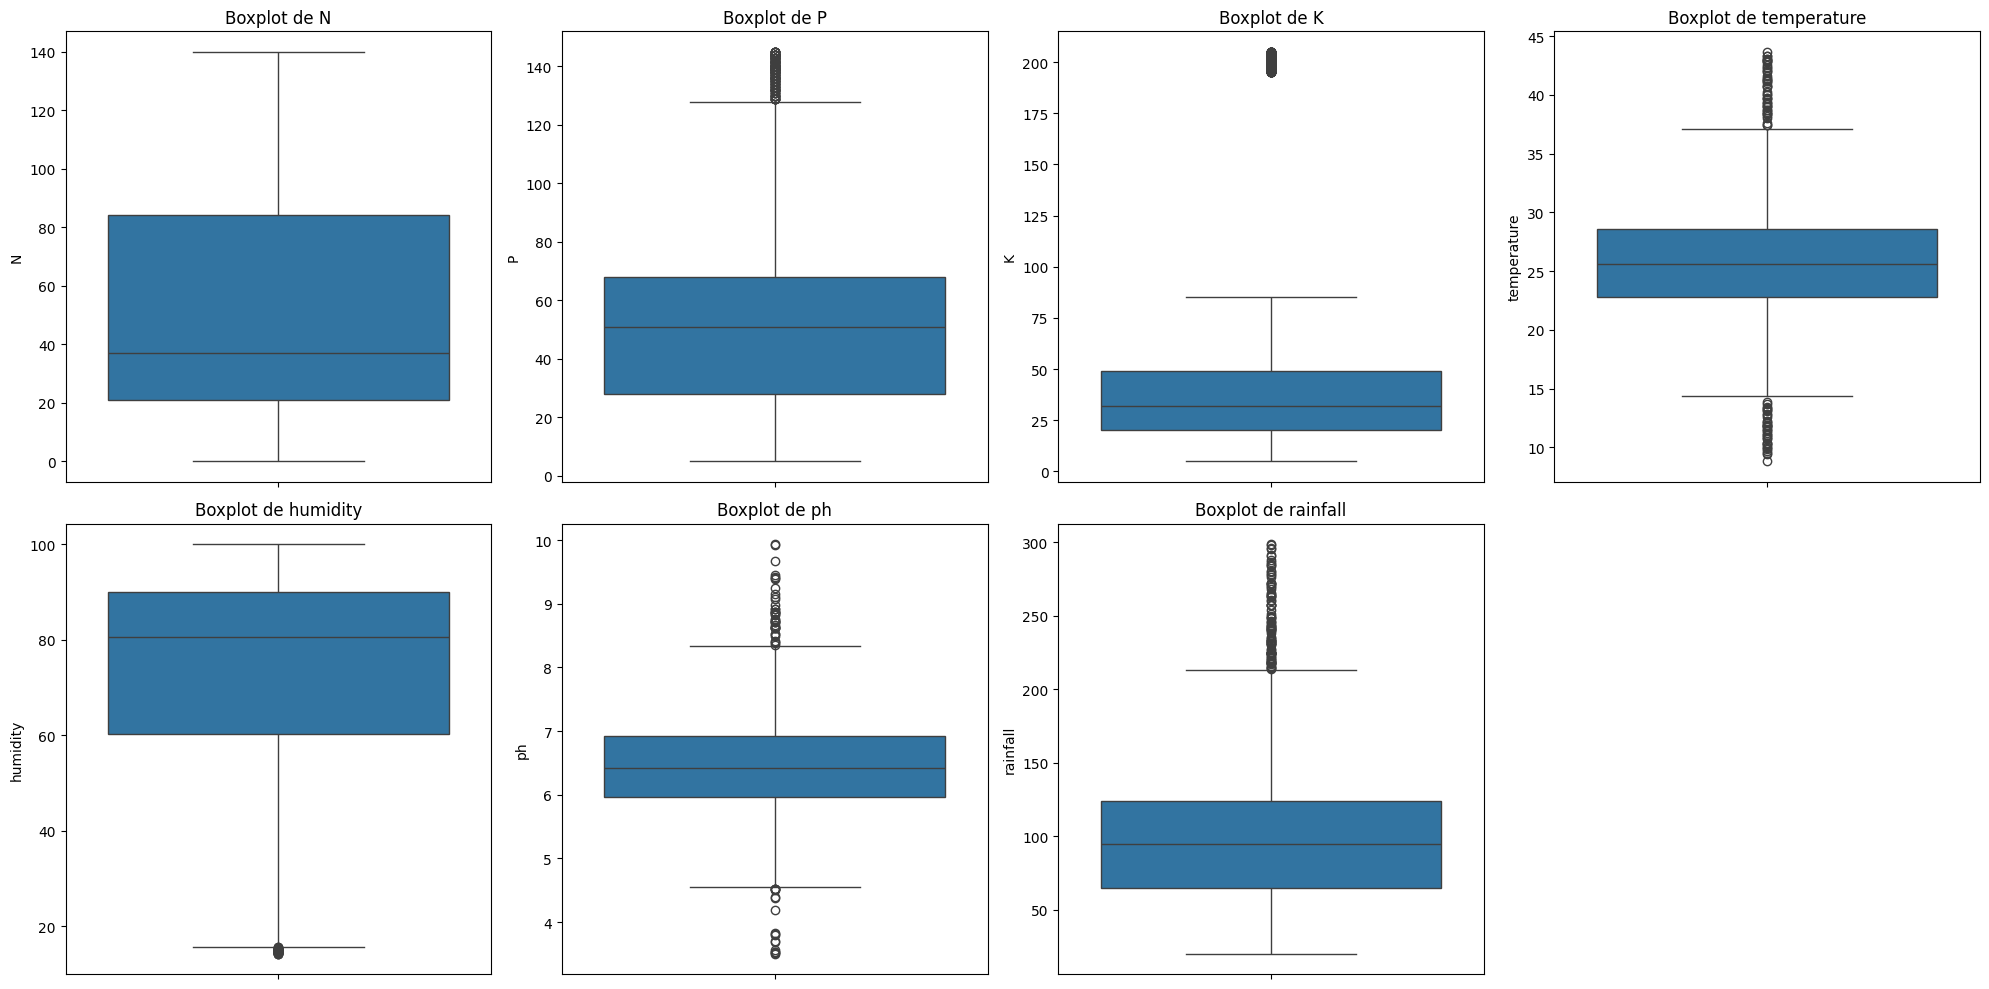

In [ ]:
#Analise exploratoria

print(df[numerais].describe())

# Boxplots para detectar outliers visualmente
plt.figure(figsize=(20, 10))
for i, coluna_name in enumerate(numerais, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(df[coluna_name])
    plt.title(f"Boxplot de {coluna_name}")
plt.tight_layout()
plt.show()

In [ ]:
#Analise exploratoria

# Contagem de cada classe
distribuicao_classe = df['label'].value_counts()
print("Distribuição das Classes:\n", distribuicao_classe)


Distribuição das Classes:
 label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


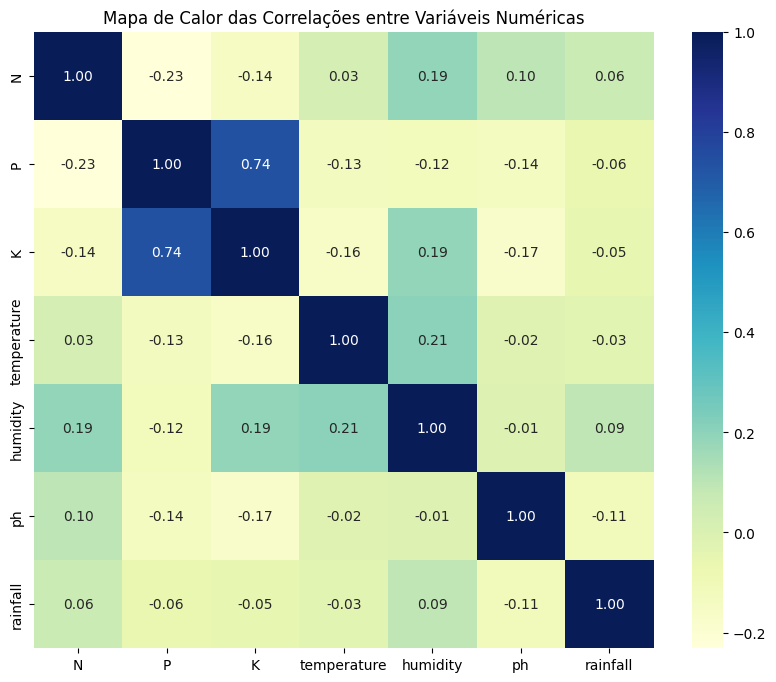

In [ ]:
#Analise exploratoria

# Selecionando apenas colunas numéricas para a matriz de correlação
numericais_data = df.select_dtypes(include=['float64', 'int64'])

# Calculando a matriz de correlação
matrix_correlacao = numericais_data.corr()

# Plotando o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_correlacao, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Mapa de Calor das Correlações entre Variáveis Numéricas")
plt.show()


In [ ]:
#Analise exploratoria

# Estatísticas descritivas para variáveis numéricas
estatisticas_descritiva = df[numerais].describe()
print("Estatísticas Descritivas:\n", estatisticas_descritiva)

Estatísticas Descritivas:
                  N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [ ]:
# tipos de dados e quantidades de valores nulos
data_info = df.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [ ]:
# Contagem de valores únicos para variáveis categóricas
valores_unicos = df['label'].value_counts()
print("Ocorrências de cada valor único de 'label':\n", valores_unicos)

Ocorrências de cada valor único de 'label':
 label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


# ***Análise descritiva***


**Principais Achados:**

Variabilidade dos Nutrientes,Diversidade Climática, Distribuição Uniforme das Culturas

 Os nutrientes N, P e K apresentam uma distribuição diversa, o que pode influenciar na escolha da cultura apropriada para diferentes tipos de solo.


O dataset contém amostras de diversas condições climáticas, com uma ampla faixa de temperatura, umidade e precipitação, o que ajuda a modelar culturas para várias regiões.


Há equilíbrio na quantidade de amostras para cada tipo de cultura, o que contribui para análises sem vieses.

Existe uma correlação moderada entre o fósforo e o potássio, indicando uma interação entre esses nutrientes no solo.
Preferência de pH por Cultura: Cada cultura tem uma faixa preferencial de pH, importante para recomendações de correção de acidez no solo.



---



**Este gráfico mostra a distribuição dos nutrientes essenciais no solo.**


O histograma revela a concentração dos valores de N (Nitrogênio), P (Fósforo) e K (Potássio).





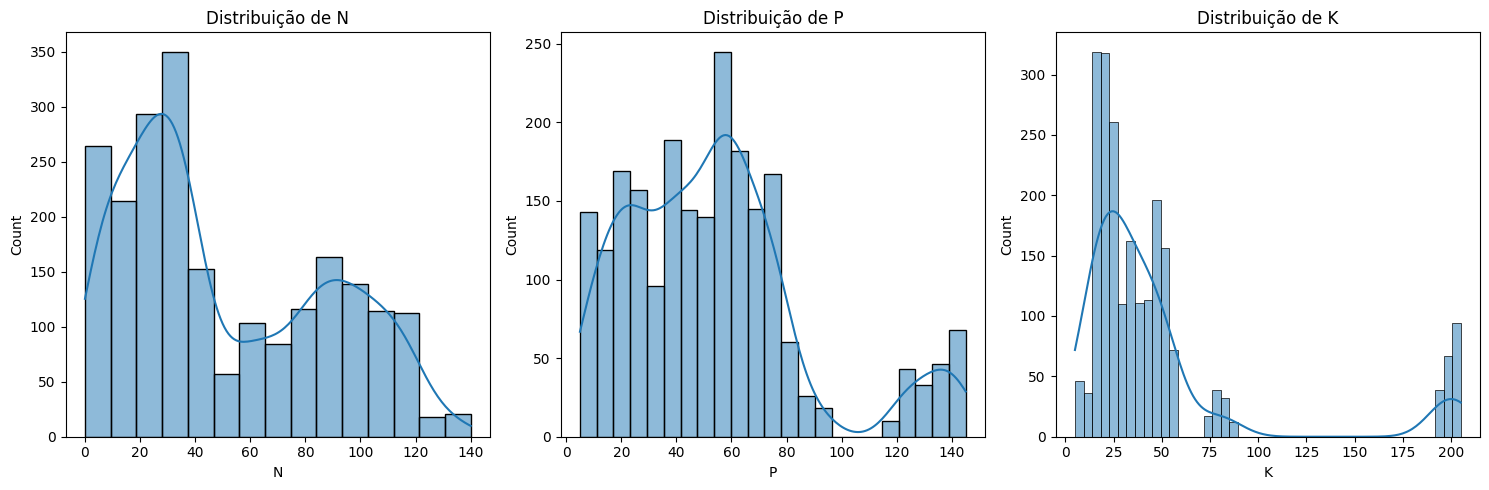

In [ ]:
# Plotando histogramas para N, P e K
plt.figure(figsize=(15, 5))
for i, coluna_name in enumerate(['N', 'P', 'K'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[coluna_name], kde=True)
    plt.title(f'Distribuição de {coluna_name}')
plt.tight_layout()
plt.show()




---


**O boxplot das variáveis climáticas ajuda a identificar possíveis outliers e o intervalo de variação.**


A maior parte dos valores está entre 20°C e 30°C, com alguns outliers abaixo de 10°C e acima de 40°C, sugerindo uma variedade climática no dataset.

Já A umidade Variáva entre 60% e 90%.

E a precipitação Varia amplamente, com valores entre 20 mm e 300 mm.


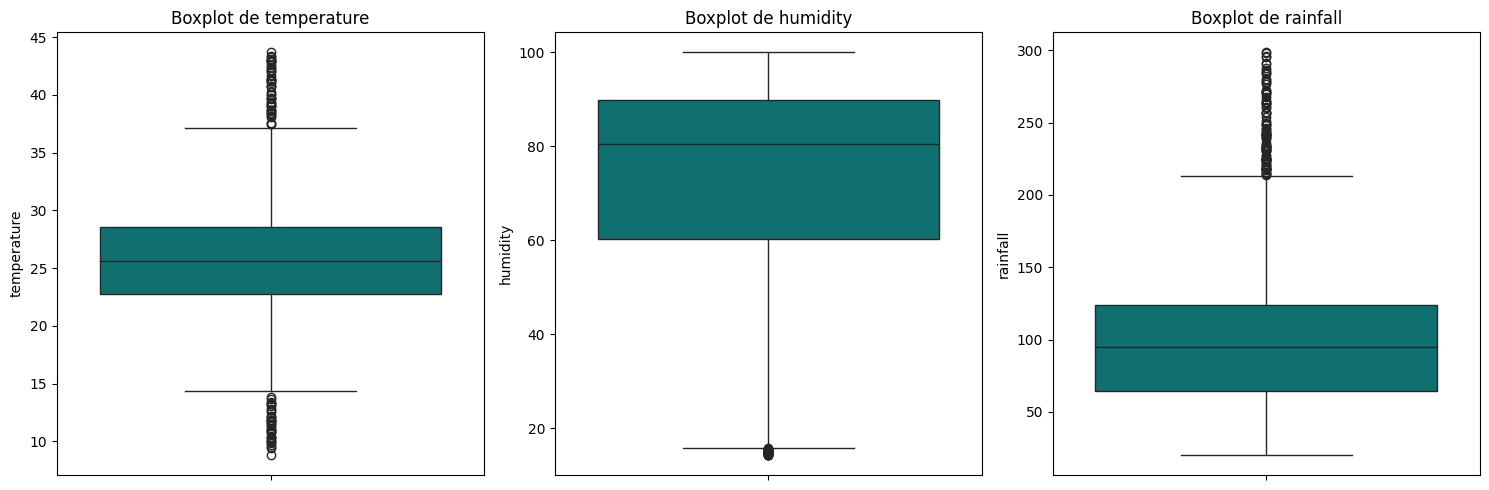

In [ ]:
# Boxplot das variáveis climáticas
plt.figure(figsize=(15, 5))
for i, coluna_name in enumerate(['temperature', 'humidity', 'rainfall'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[coluna_name], color='teal')
    plt.title(f'Boxplot de {coluna_name}')
plt.tight_layout()
plt.show()




---


**Gráfico de Barras das Ocorrências de Cada Cultura**

Este gráfico ajuda a entender a distribuição de amostras entre diferentes culturas.

A distribuição é uniforme, com 100 amostras para cada cultura. Isso é positivo para o balanceamento da base, pois evita o viés de classes desbalanceadas no treinamento de modelos de classificação.

<ipython-input-12-ff58b4de9eeb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=df, order=df['label'].value_counts().index, palette="viridis")


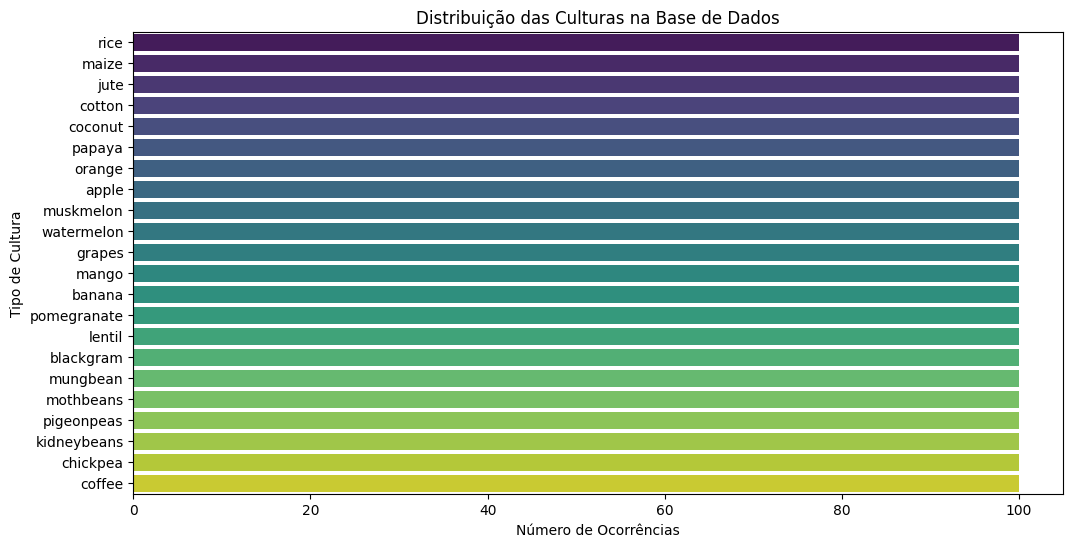

In [ ]:
# Gráfico de barras para a variável 'label'
plt.figure(figsize=(12, 6))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index, palette="viridis")
plt.title("Distribuição das Culturas na Base de Dados")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Tipo de Cultura")
plt.show()




---


**Mapa de Calor de Correlações entre Variáveis Numéricas**

Há uma correlação moderada entre P e K, indicando que esses nutrientes podem ter relações interdependentes no solo.

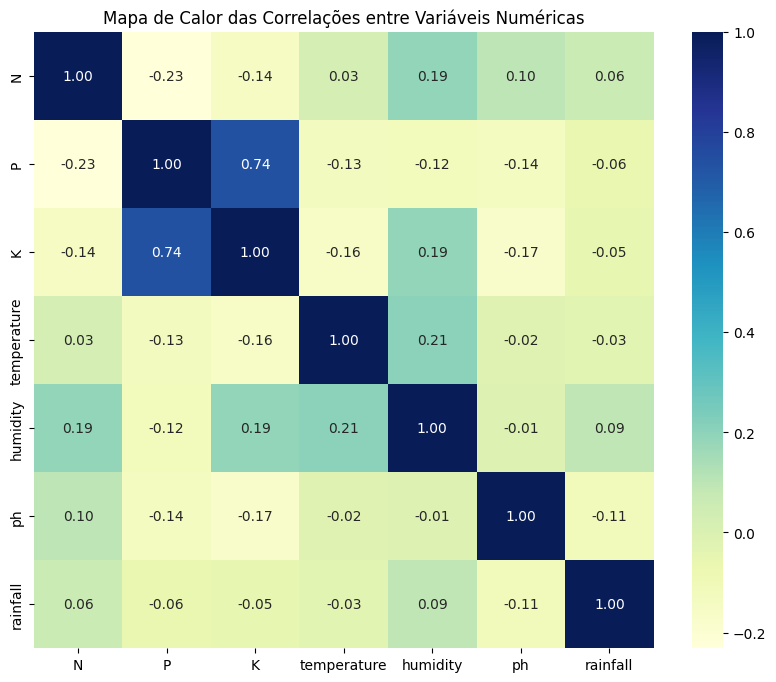

In [ ]:
# Selecionando apenas colunas numéricas
numericais_data = df.select_dtypes(include=['float64', 'int64'])

# Calculando a matriz de correlação
matrix_correlacao = numericais_data.corr()

# Plotando o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_correlacao, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Mapa de Calor das Correlações entre Variáveis Numéricas")
plt.show()




---


**Boxplot do pH por Tipo de Cultura**

Este gráfico mostra que culturas como café preferem solos ligeiramente ácidos, enquanto outras, como arroz e grãos, possuem uma maior tolerância a uma faixa de pH mais ampla.

<ipython-input-14-aeb812f3fb75>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ph', y='label', data=df, palette="viridis")


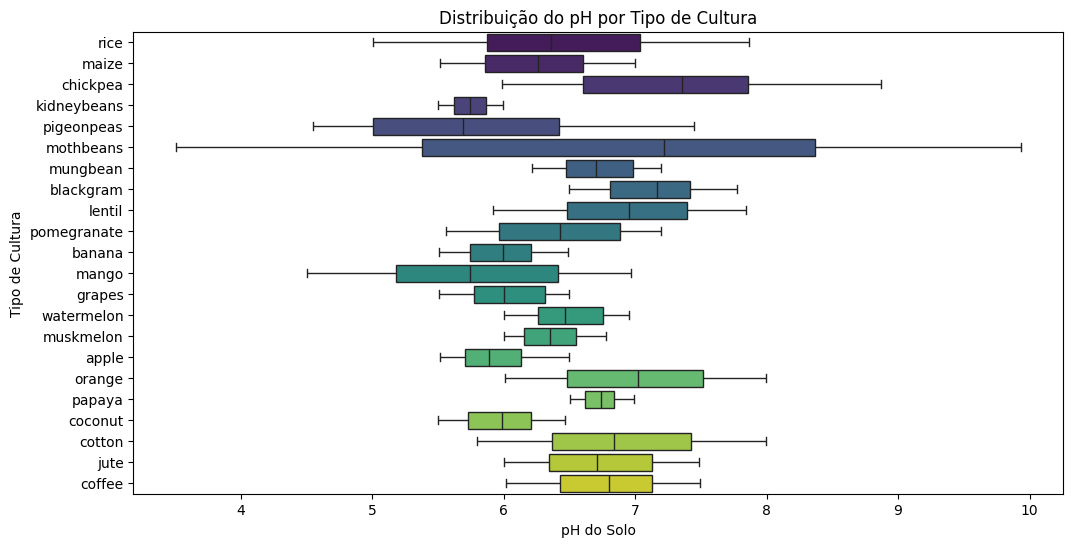

In [ ]:
# Boxplot do pH por cultura
plt.figure(figsize=(12, 6))
sns.boxplot(x='ph', y='label', data=df, palette="viridis")
plt.title("Distribuição do pH por Tipo de Cultura")
plt.xlabel("pH do Solo")
plt.ylabel("Tipo de Cultura")
plt.show()


# **Perfil ideal**

Para identificar o “perfil ideal” de solo e clima para as plantações, podemos analisar as condições médias e a faixa de variabilidade das variáveis como nutrientes, temperatura, umidade e pH para cada cultura presente na base de dados.


Com as preferências de três culturas distintas, escolhemos, arroz, café, e algodão para análise.

In [ ]:
# Identificando o perfil ideal com média e intervalo(IQR)
perfil_ideal = df.describe().loc[['mean', '50%', '25%', '75%']]

print("Perfil Ideal (Média e IQR):\n", perfil_ideal)


Perfil Ideal (Média e IQR):
               N          P          K  temperature   humidity        ph  \
mean  50.551818  53.362727  48.149091    25.616244  71.481779  6.469480   
50%   37.000000  51.000000  32.000000    25.598693  80.473146  6.425045   
25%   21.000000  28.000000  20.000000    22.769375  60.261953  5.971693   
75%   84.250000  68.000000  49.000000    28.561654  89.948771  6.923643   

        rainfall  
mean  103.463655  
50%    94.867624  
25%    64.551686  
75%   124.267508  


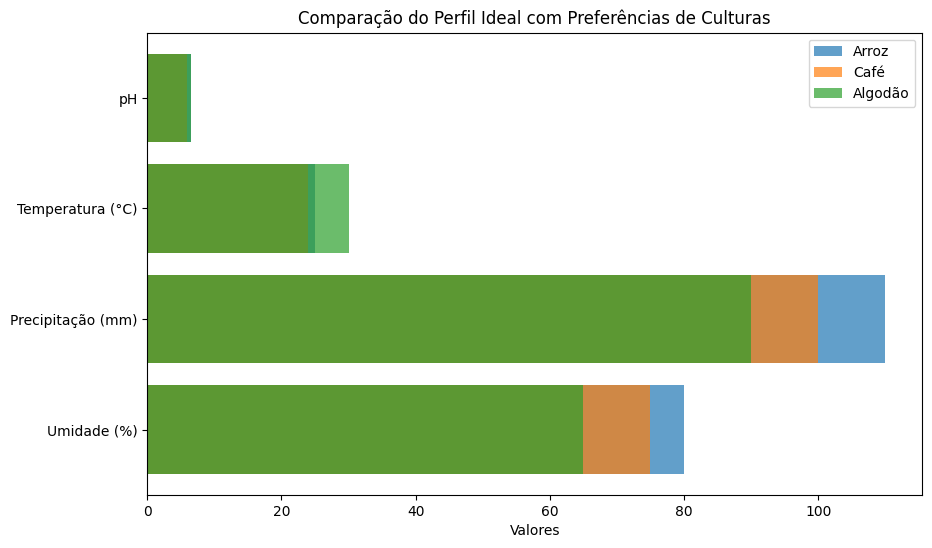

In [ ]:
# Exemplo de gráfico
# comparativo do perfil ideal vs. preferências de culturas

culturas = ['Arroz', 'Café', 'Algodão']
variaveis = ['Umidade (%)', 'Precipitação (mm)', 'Temperatura (°C)', 'pH']
valores_ideais = [perfil_ideal.loc['mean', 'humidity'], perfil_ideal.loc['mean', 'rainfall'],
                  perfil_ideal.loc['mean', 'temperature'], perfil_ideal.loc['mean', 'ph']]
valores_culturas = {
    'Arroz': [80, 110, 25, 6.5],
    'Café': [75, 100, 24, 6.0],
    'Algodão': [65, 90, 30, 6.5]
}

# Plotando gráfico
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(variaveis))

for i, cultura in enumerate(culturas):
    ax.barh(x, valores_culturas[cultura], label=cultura, alpha=0.7)

ax.set_yticks(x)
ax.set_yticklabels(variaveis)
ax.legend()
plt.title("Comparação do Perfil Ideal com Preferências de Culturas")
plt.xlabel("Valores")
plt.show()





---



**Arroz:**
* Arroz prefere umidade alta, idealmente em torno de 80%, o que se alinha bem com o perfil ideal (60-90%).

* Esta cultura prospera em áreas com alta precipitação, geralmente acima de 100 mm, e o perfil ideal de precipitação entre 60 mm e 120 mm atende bem a essa preferência.


* O Arroz tolera uma faixa neutra a ligeiramente ácida de pH (6 - 7), semelhante ao intervalo ideal (5.97 - 6.92).



---

**Café**

*   Café se adapta bem a níveis altos de umidade, preferindo entre 70% e 80%, o que coincide com o intervalo ideal.

* Café prospera em climas moderados, entre 20°C e 25°C. O perfil ideal atende a essa faixa, com temperaturas entre 22°C e 28°C.

*  A faixa ideal de pH para café é ligeiramente ácida (5 - 6), o que coincide com o perfil ideal (5.97 - 6.92).


---

**Algodão**

*   Algodão prefere temperaturas mais altas, entre 25°C e 35°C. O perfil ideal é um pouco mais frio, mas o intervalo de 22.77°C a 28.56°C é próximo do ideal para o algodão.

* Algodão é mais tolerante à variação de umidade e não exige níveis tão altos quanto arroz e café. No entanto, o intervalo de 60% a 90% de umidade da base é adequado.

*  Algodão prefere solos levemente ácidos a neutros (6 -7), o que é bem atendido pelo perfil ideal.



---



Conclusão:

Os três perfil se adapta bem ao perfil ideal, com pequenas resaltas:
O arroz, com uma leve preferência por umidade e precipitação um pouco mais altas, o café, apenas preferindo condições ligeiramente mais ácidas e o algodão, com uma leve preferência por temperaturas mais altas.


O perfil ideal de solo e clima da base atende a uma ampla variedade de culturas, principalmente devido à faixa intermediária de pH, umidade e temperatura.









# **Modelos preditivos**

In [ ]:
#Modelos

# Separando features e rótulo
X = df.drop(columns=['label'])
y = df['label']

# Codificar a variável target como valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Padronização das variáveis numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializar dicionário para armazenar resultados
resultado_modelos = {}

# Função para avaliar e armazenar os resultados de cada modelo
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    resultado_modelos[model_name] = accuracy
    print(f"{model_name} Acurácia: {accuracy:.2f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.show()

K-Nearest Neighbors Acurácia: 0.96
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.89      1.00      0.94        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.96      0.88        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.69      1.00      0.81        11
       maize       1.00      0.90      0.95        21
       mango       0.90      1.00      0.95        19
   mothbeans       1.00      0.83      0.91        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00   

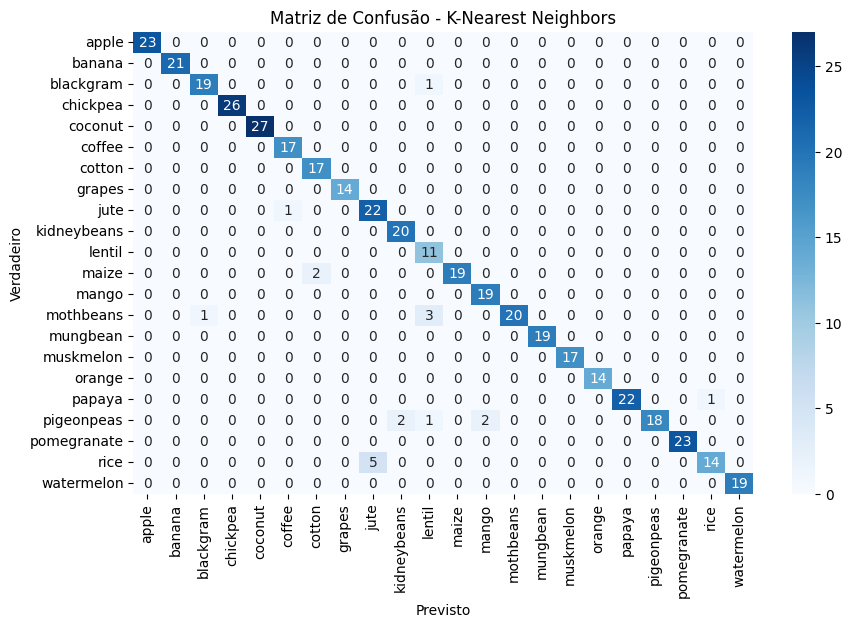

In [ ]:
# 1. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, "K-Nearest Neighbors")

Decision Tree Acurácia: 0.99
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.96      1.00      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        1

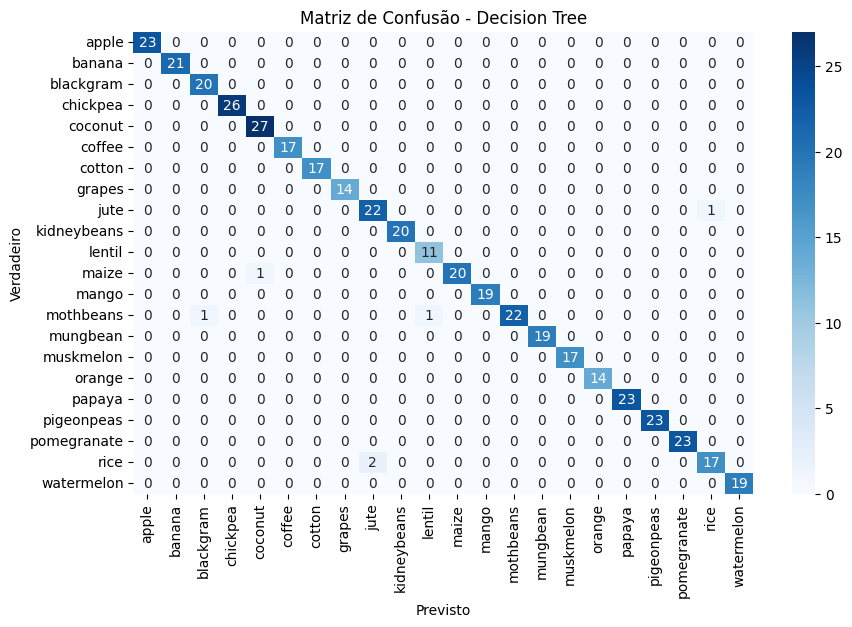

In [ ]:
# 2. Decision Tree
tree = DecisionTreeClassifier(random_state=42)
evaluate_model(tree, "Decision Tree")

Random Forest Acurácia: 0.99
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        1

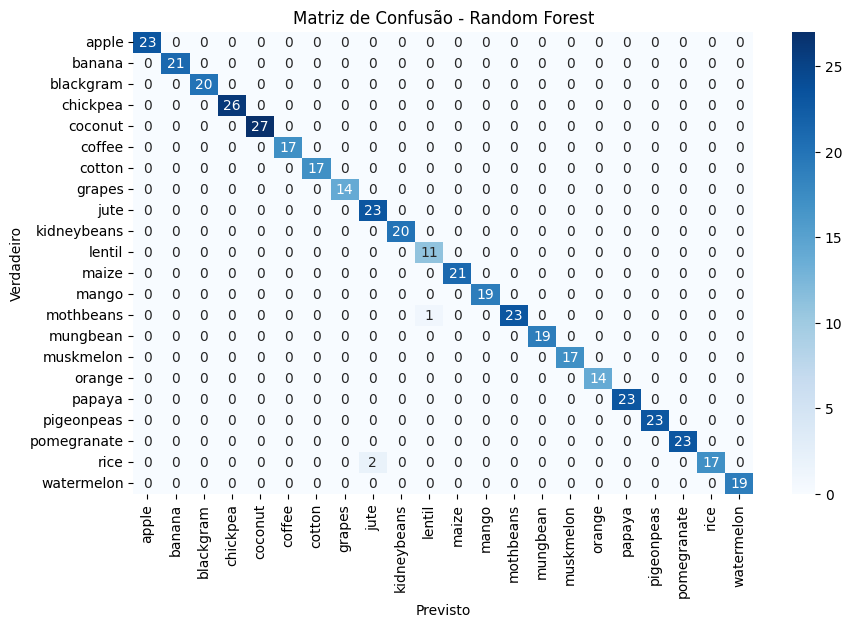

In [ ]:
# 3. Random Forest
rf = RandomForestClassifier(random_state=42)
evaluate_model(rf, "Random Forest")

Support Vector Machine Acurácia: 0.97
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.78      0.91      0.84        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00

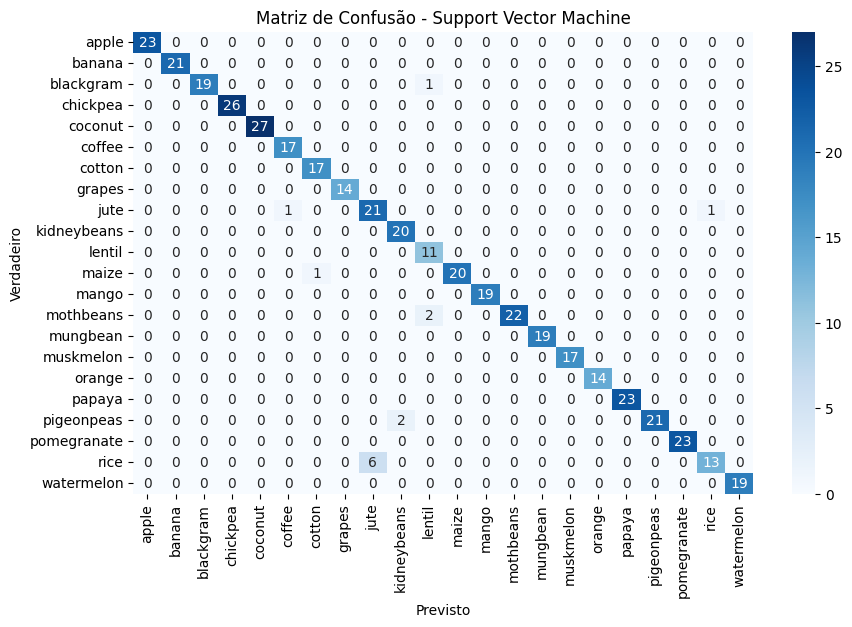

In [ ]:
# 4. Support Vector Machine (SVM)
svm = SVC()
evaluate_model(svm, "Support Vector Machine")

Logistic Regression Acurácia: 0.96
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.90      0.95      0.93        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.83      0.87      0.85        23
 kidneybeans       0.95      0.95      0.95        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00   

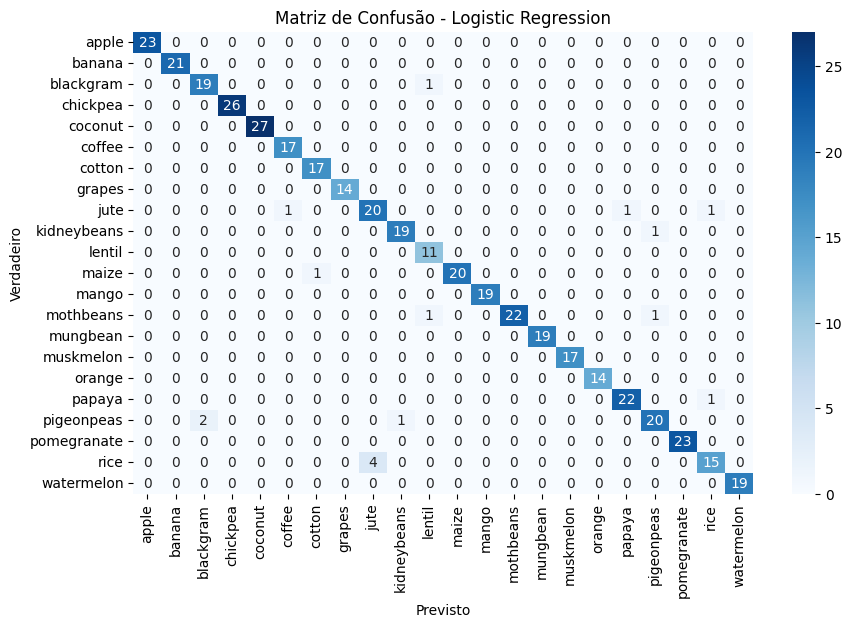

In [ ]:
# 5. Logistic Regression
log_reg = LogisticRegression(max_iter=200)
evaluate_model(log_reg, "Logistic Regression")

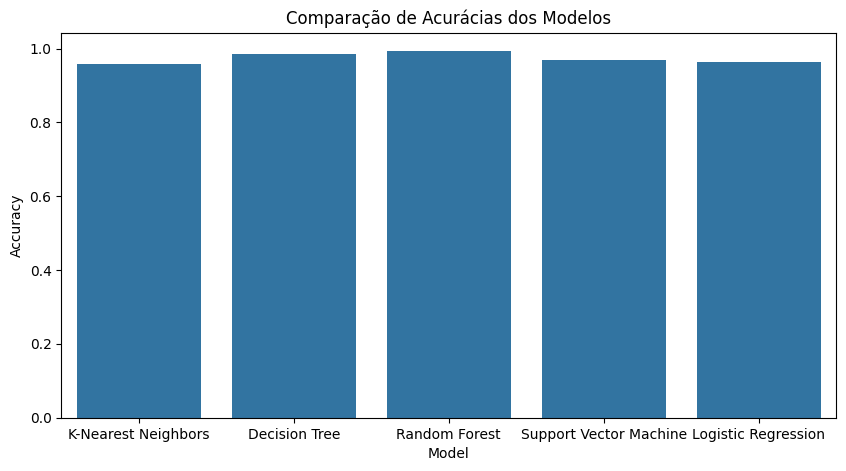

In [ ]:
# Comparação das Acurácias dos Modelos
resultado_modelos_df = pd.DataFrame(list(resultado_modelos.items()), columns=['Model', 'Accuracy'])
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Accuracy', data=resultado_modelos_df)
plt.title('Comparação de Acurácias dos Modelos')
plt.show()

# Conclusão


Este trabalho proporcionou uma visão clara sobre como diferentes condições de solo e clima impactam o desenvolvimento das culturas agrícolas. A análise detalhada das variáveis permitiu identificar as características mais favoráveis a cada tipo de cultivo, como níveis ideais de umidade, temperatura e nutrientes no solo, o que gera insights práticos para otimizar a produção em diferentes cenários.

Na etapa de modelagem preditiva, os cinco modelos testados trouxeram resultados variados, ajudando a entender qual abordagem se adapta melhor ao conjunto de dados e à previsão do tipo de cultura ideal para diferentes condições ambientais. A comparação entre esses modelos destaca as possibilidades e os limites de cada técnica, trazendo uma base inicial promissora para aplicações no setor agrícola.

Algumas limitações do trabalho são, no entanto, relevantes. A quantidade de dados poderia ser maior para uma análise ainda mais robusta e precisa. Além disso, ajustes adicionais nos modelos – como a otimização dos hiperparâmetros – poderiam ter gerado uma performance mais refinada. Mesmo assim, o trabalho oferece uma base sólida para aplicações futuras e mostra o potencial de melhorar a tomada de decisão no campo, com o uso de dados para alcançar uma produção mais eficiente e sustentável